<a href="https://colab.research.google.com/github/FaithGakori/Online-Retail-Analysis/blob/main/Online_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib
%pylab inline
!pip install pandas openpyxl

Using matplotlib backend: <object object at 0x7f89b5af7b90>
Populating the interactive namespace from numpy and matplotlib


In [ ]:
# import dataset
df = pd.read_excel('Online Retail.xlsx', engine='openpyxl')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# brief description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Revenue      541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [ ]:
df.shape

(541909, 9)

In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
Revenue,float64


### *categorical columns are; description & country*

In [ ]:
# duplicates
df.duplicated().sum()

5268

In [ ]:
# missing values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Revenue,0


In [ ]:
# statistical analysis
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,541909.000000,541909,541909.000000,406829.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600303,378.810824


# Data Cleaning


In [ ]:
# convert country and descrition into categorical columns
df['Description'] = df['Description'].astype('category')
df['Country'] = df['Country'].astype('category')

print(df.dtypes)

InvoiceNo              object
StockCode              object
Description          category
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country              category
Revenue               float64
dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Quantity'>

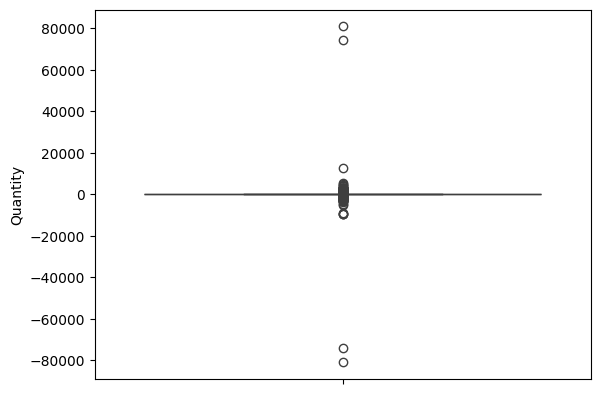

In [ ]:
# outliers
sns.boxplot(df['Quantity'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='UnitPrice'>

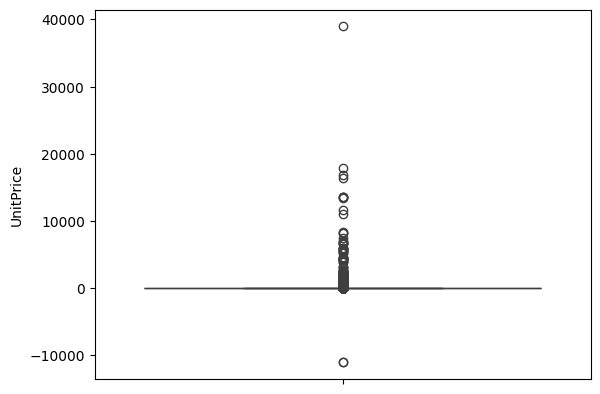

In [ ]:
sns.boxplot(df['UnitPrice'])
#deal with the negative values

In [ ]:
# quantity should not be below 1 unit
# unit price should not be below $0

df1 = df[(df['Quantity'] >= 1) & (df['UnitPrice'] >=0)]

df1.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,531283.000000,531283,531283.000000,397924.000000,531283.000000
mean,10.655299,2011-07-04 18:15:33.177910016,3.898954,15294.315171,20.077218
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,1.000000,2011-03-28 11:59:00,1.250000,13969.000000,3.750000
50%,3.000000,2011-07-20 12:01:00,2.080000,15159.000000,9.900000
75%,10.000000,2011-10-19 12:35:00,4.130000,16795.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,156.830617,NaN,35.876279,1713.169877,270.058254


In [ ]:
# Specify the filename you want to save
filename = 'OnlineRetail.xlsx'

# Export to Excel
df1.to_excel(filename, index=False)

In [ ]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>